# Hands-on: Implementing a Perceptron with NumPy

In this notebook, we'll implement a perceptron from scratch using NumPy. By the end of this session, you'll understand:

1. How to implement forward propagation
2. Different activation functions
3. Training a perceptron with simple rules
4. Visualizing decision boundaries

## Learning Objectives
- Implement a perceptron class with NumPy
- Understand the role of weights, bias, and activation functions
- Train a perceptron to solve simple classification problems
- Visualize how the perceptron learns

## 1. Import Required Libraries

Let's start by importing the libraries we'll need:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Set up plotting style
plt.style.use('seaborn')
sns.set_palette("husl")

print("Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")

Libraries imported successfully!
NumPy version: 1.23.5


## 2. Activation Functions

First, let's implement the activation functions we learned about:

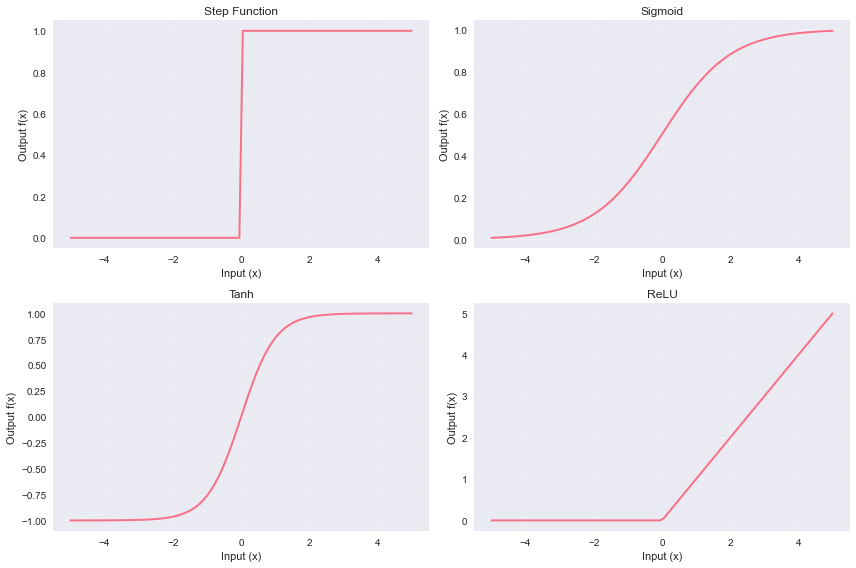

In [3]:
def step_function(x):
    """
    Step function: returns 1 if x >= 0, 0 otherwise
    """
    return np.where(x >= 0, 1, 0)

def sigmoid(x):
    """
    Sigmoid function: returns 1 / (1 + exp(-x))
    """
    # Clip x to prevent overflow
    x = np.clip(x, -250, 250)
    return 1 / (1 + np.exp(-x))

def tanh(x):
    """
    Hyperbolic tangent function
    """
    return np.tanh(x)

def relu(x):
    """
    ReLU function: returns max(0, x)
    """
    return np.maximum(0, x)

# Let's visualize these activation functions
x = np.linspace(-5, 5, 100)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

functions = [step_function, sigmoid, tanh, relu]
names = ['Step Function', 'Sigmoid', 'Tanh', 'ReLU']

for i, (func, name) in enumerate(zip(functions, names)):
    axes[i].plot(x, func(x), linewidth=2)
    axes[i].set_title(f'{name}')
    axes[i].grid(True, alpha=0.3)
    axes[i].set_xlabel('Input (x)')
    axes[i].set_ylabel('Output f(x)')

plt.tight_layout()
plt.show()

## 3. Implement the Perceptron Class

Now let's implement our perceptron class:

In [5]:
class Perceptron:
    def __init__(self, n_inputs, activation='step', learning_rate=0.01):
        """
        Initialize the perceptron
        
        Parameters:
        - n_inputs: number of input features
        - activation: activation function ('step', 'sigmoid', 'tanh', 'relu')
        - learning_rate: learning rate for training
        """
        self.n_inputs = n_inputs
        self.learning_rate = learning_rate
        
        # Initialize weights and bias randomly
        self.weights = np.random.normal(0, 0.1, n_inputs)
        self.bias = np.random.normal(0, 0.1)
        
        # Set activation function
        self.activation_functions = {
            'step': step_function,
            'sigmoid': sigmoid,
            'tanh': tanh,
            'relu': relu
        }
        self.activation = self.activation_functions[activation]
        self.activation_name = activation
        
        # Keep track of training history
        self.training_history = []
    
    def forward(self, X):
        """
        Forward propagation
        
        Parameters:
        - X: input data (n_samples, n_features)
        
        Returns:
        - output after activation function
        """
        # Calculate weighted sum: z = X @ weights + bias
        linear_output = np.dot(X, self.weights) + self.bias
        
        # Apply activation function
        activated_output = self.activation(linear_output)
        
        return activated_output
    
    def predict(self, X):
        """
        Make predictions on new data
        """
        return self.forward(X)
    
    def train_step(self, X, y):
        """
        Perform one training step (for step function only)
        
        Parameters:
        - X: input data (n_samples, n_features)
        - y: true labels (n_samples,)
        
        Returns:
        - error: classification error
        """
        # Make predictions
        predictions = self.forward(X)
        
        # Calculate errors
        errors = y - predictions
        
        # Update weights and bias using perceptron learning rule
        # w = w + learning_rate * (y - y_pred) * x
        self.weights += self.learning_rate * np.dot(X.T, errors)
        self.bias += self.learning_rate * np.sum(errors)
        
        # Calculate total error
        total_error = np.sum(np.abs(errors))
        
        return total_error
    
    def train(self, X, y, epochs=100):
        """
        Train the perceptron
        
        Parameters:
        - X: input data (n_samples, n_features)
        - y: true labels (n_samples,)
        - epochs: number of training epochs
        """
        self.training_history = []
        
        for epoch in range(epochs):
            # Perform one training step
            error = self.train_step(X, y)
            
            # Record training history
            self.training_history.append(error)
            
            # Print progress every 10 epochs
            if (epoch + 1) % 10 == 0:
                print(f"Epoch {epoch + 1}/{epochs}, Error: {error}")
            
            # Stop if converged (error is 0)
            if error == 0:
                print(f"Converged after {epoch + 1} epochs!")
                break
    
    def plot_training_history(self):
        """
        Plot the training history
        """
        plt.figure(figsize=(10, 6))
        plt.plot(self.training_history, linewidth=2)
        plt.title('Training History')
        plt.xlabel('Epoch')
        plt.ylabel('Total Error')
        plt.grid(True, alpha=0.3)
        plt.show()

print("Perceptron class implemented successfully!")

Perceptron class implemented successfully!


## 4. Test with Simple Data

Let's test our perceptron with simple linearly separable data:

AND Gate Data:
Inputs:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
Labels:
[0 0 0 1]


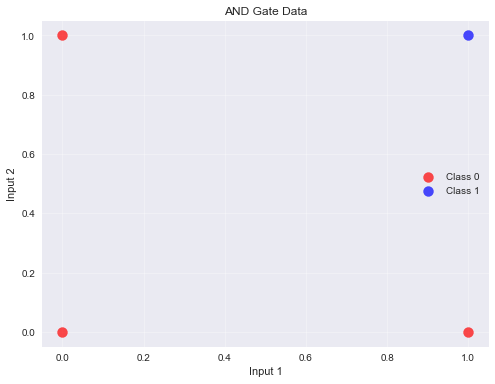

In [6]:
# Create simple linearly separable data
# AND gate data
X_and = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])

y_and = np.array([0, 0, 0, 1])  # AND gate outputs

print("AND Gate Data:")
print("Inputs:")
print(X_and)
print("Labels:")
print(y_and)

# Visualize the data
plt.figure(figsize=(8, 6))
colors = ['red', 'blue']
for i in range(2):
    mask = y_and == i
    plt.scatter(X_and[mask, 0], X_and[mask, 1], 
               c=colors[i], label=f'Class {i}', s=100, alpha=0.7)

plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.title('AND Gate Data')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 5. Train the Perceptron on AND Gate

Now let's train our perceptron to learn the AND gate:

Initial weights: [ 0.04967142 -0.01382643]
Initial bias: 0.06476885381006925

Training perceptron on AND gate...
Epoch 10/20, Error: 0
Converged after 10 epochs!

Final weights: [0.14967142 0.18617357]
Final bias: -0.23523114618993077

Testing trained perceptron:
Input: [0 0], Expected: 0, Predicted: 0
Input: [0 1], Expected: 0, Predicted: 0
Input: [1 0], Expected: 0, Predicted: 0
Input: [1 1], Expected: 1, Predicted: 1


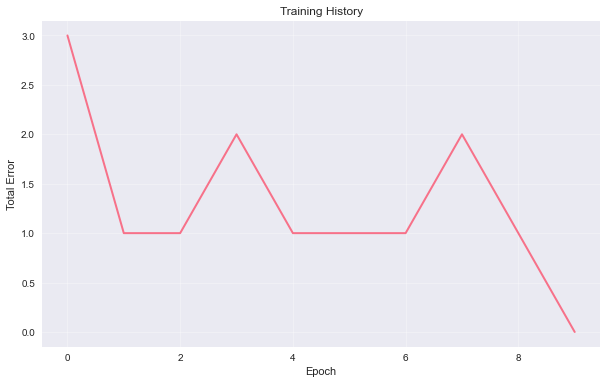

In [7]:
# Create and train perceptron
perceptron_and = Perceptron(n_inputs=2, activation='step', learning_rate=0.1)

print("Initial weights:", perceptron_and.weights)
print("Initial bias:", perceptron_and.bias)
print("\nTraining perceptron on AND gate...")

# Train the perceptron
perceptron_and.train(X_and, y_and, epochs=20)

print("\nFinal weights:", perceptron_and.weights)
print("Final bias:", perceptron_and.bias)

# Test the trained perceptron
print("\nTesting trained perceptron:")
for i in range(len(X_and)):
    prediction = perceptron_and.predict(X_and[i:i+1])[0]
    print(f"Input: {X_and[i]}, Expected: {y_and[i]}, Predicted: {prediction}")

# Plot training history
perceptron_and.plot_training_history()

## 6. Visualize Decision Boundary

Let's visualize how the perceptron creates a decision boundary:

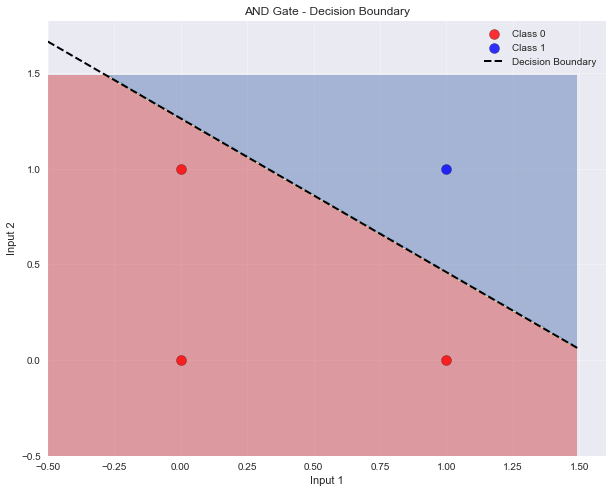

In [8]:
def plot_decision_boundary(perceptron, X, y, title="Decision Boundary"):
    """
    Plot the decision boundary of the perceptron
    """
    plt.figure(figsize=(10, 8))
    
    # Create a mesh of points
    h = 0.01  # step size
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Make predictions on the mesh
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = perceptron.predict(mesh_points)
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
    
    # Plot the data points
    colors = ['red', 'blue']
    for i in range(2):
        mask = y == i
        plt.scatter(X[mask, 0], X[mask, 1], 
                   c=colors[i], label=f'Class {i}', s=100, alpha=0.8, edgecolors='black')
    
    # Plot the decision line (for 2D data)
    if X.shape[1] == 2:
        w1, w2 = perceptron.weights
        b = perceptron.bias
        
        # Decision line: w1*x1 + w2*x2 + b = 0
        # Solve for x2: x2 = -(w1*x1 + b) / w2
        if w2 != 0:
            x_line = np.linspace(x_min, x_max, 100)
            y_line = -(w1 * x_line + b) / w2
            plt.plot(x_line, y_line, 'k--', linewidth=2, label='Decision Boundary')
    
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Plot decision boundary for AND gate
plot_decision_boundary(perceptron_and, X_and, y_and, "AND Gate - Decision Boundary")

## 7. Try Different Logic Gates

Let's test our perceptron on different logic gates:


Training perceptron on OR gate
Converged after 3 epochs!

Testing OR gate:
Input: [0 0], Expected: 0, Predicted: 0
Input: [0 1], Expected: 1, Predicted: 1
Input: [1 0], Expected: 1, Predicted: 1
Input: [1 1], Expected: 1, Predicted: 1


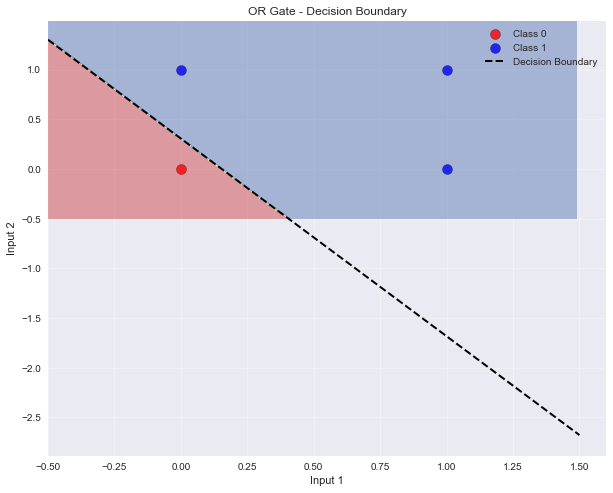


Training perceptron on NAND gate
Converged after 4 epochs!

Testing NAND gate:
Input: [0 0], Expected: 1, Predicted: 1
Input: [0 1], Expected: 1, Predicted: 1
Input: [1 0], Expected: 1, Predicted: 1
Input: [1 1], Expected: 0, Predicted: 0


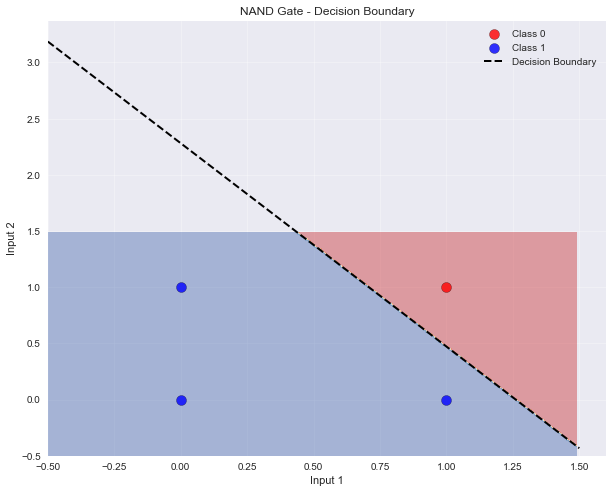


Training perceptron on NOR gate
Converged after 6 epochs!

Testing NOR gate:
Input: [0 0], Expected: 1, Predicted: 1
Input: [0 1], Expected: 0, Predicted: 0
Input: [1 0], Expected: 0, Predicted: 0
Input: [1 1], Expected: 0, Predicted: 0


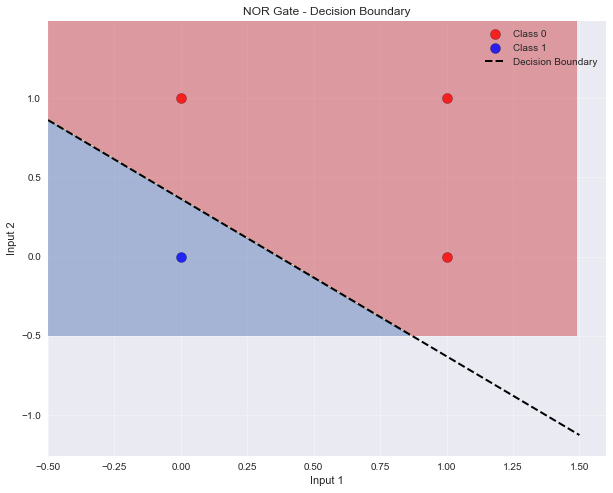

In [9]:
# Define different logic gates
gates = {
    'OR': np.array([0, 1, 1, 1]),
    'NAND': np.array([1, 1, 1, 0]),
    'NOR': np.array([1, 0, 0, 0])
}

# Same input data for all gates
X_gates = np.array([[0, 0],
                    [0, 1], 
                    [1, 0],
                    [1, 1]])

# Train perceptron on each gate
perceptrons = {}

for gate_name, y_gate in gates.items():
    print(f"\n{'='*50}")
    print(f"Training perceptron on {gate_name} gate")
    print(f"{'='*50}")
    
    # Create and train perceptron
    perceptron = Perceptron(n_inputs=2, activation='step', learning_rate=0.1)
    perceptron.train(X_gates, y_gate, epochs=20)
    
    # Store the trained perceptron
    perceptrons[gate_name] = perceptron
    
    # Test predictions
    print(f"\nTesting {gate_name} gate:")
    for i in range(len(X_gates)):
        prediction = perceptron.predict(X_gates[i:i+1])[0]
        print(f"Input: {X_gates[i]}, Expected: {y_gate[i]}, Predicted: {prediction}")
    
    # Plot decision boundary
    plot_decision_boundary(perceptron, X_gates, y_gate, f"{gate_name} Gate - Decision Boundary")

## 8. Test with XOR Gate (Non-linearly Separable)

Let's see what happens when we try the XOR gate, which is not linearly separable:

XOR Gate Data:
Inputs:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
Labels:
[0 1 1 0]


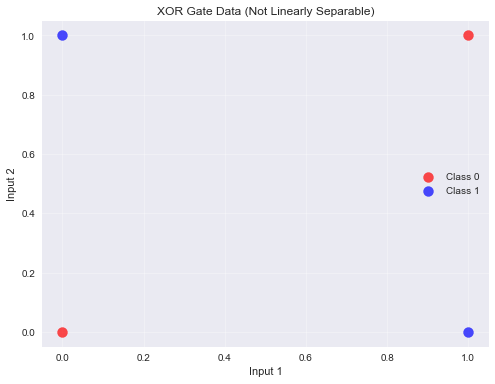


Attempting to train perceptron on XOR gate...
Epoch 10/100, Error: 2
Epoch 20/100, Error: 2
Epoch 30/100, Error: 2
Epoch 40/100, Error: 2
Epoch 50/100, Error: 2
Epoch 60/100, Error: 2
Epoch 70/100, Error: 2
Epoch 80/100, Error: 2
Epoch 90/100, Error: 2
Epoch 100/100, Error: 2

Testing XOR gate:
Input: [0 0], Expected: 0, Predicted: 0
Input: [0 1], Expected: 1, Predicted: 0
Input: [1 0], Expected: 1, Predicted: 0
Input: [1 1], Expected: 0, Predicted: 0


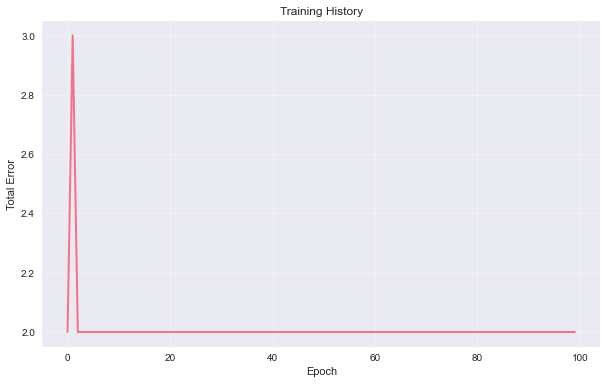

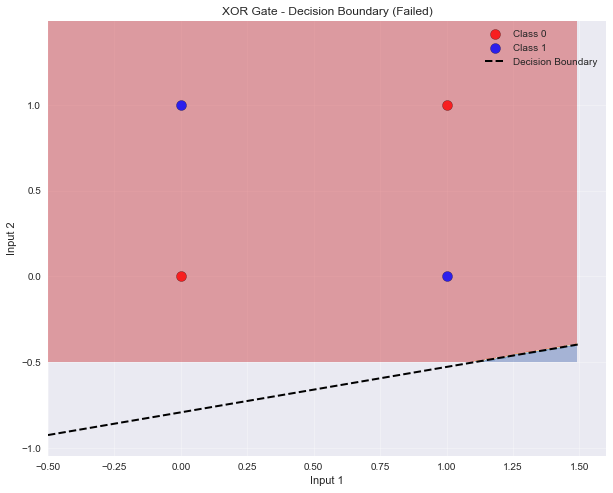


Note: The perceptron cannot learn XOR because it's not linearly separable!
This limitation led to the development of multi-layer perceptrons (neural networks).


In [10]:
# XOR gate - not linearly separable!
y_xor = np.array([0, 1, 1, 0])

print("XOR Gate Data:")
print("Inputs:")
print(X_gates)
print("Labels:")
print(y_xor)

# Visualize XOR data
plt.figure(figsize=(8, 6))
colors = ['red', 'blue']
for i in range(2):
    mask = y_xor == i
    plt.scatter(X_gates[mask, 0], X_gates[mask, 1], 
               c=colors[i], label=f'Class {i}', s=100, alpha=0.7)

plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.title('XOR Gate Data (Not Linearly Separable)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Try to train perceptron on XOR
print("\nAttempting to train perceptron on XOR gate...")
perceptron_xor = Perceptron(n_inputs=2, activation='step', learning_rate=0.1)
perceptron_xor.train(X_gates, y_xor, epochs=100)

# Test predictions
print("\nTesting XOR gate:")
for i in range(len(X_gates)):
    prediction = perceptron_xor.predict(X_gates[i:i+1])[0]
    print(f"Input: {X_gates[i]}, Expected: {y_xor[i]}, Predicted: {prediction}")

# Plot training history
perceptron_xor.plot_training_history()

# Plot decision boundary
plot_decision_boundary(perceptron_xor, X_gates, y_xor, "XOR Gate - Decision Boundary (Failed)")

print("\nNote: The perceptron cannot learn XOR because it's not linearly separable!")
print("This limitation led to the development of multi-layer perceptrons (neural networks).")

## 9. Experiment with Different Activation Functions

Let's see how different activation functions perform:


Testing sigmoid activation:
Outputs with sigmoid: [0.50785554 0.4825425  0.49379931 0.46851991]

Testing tanh activation:
Outputs with tanh: [ 0.14552435  0.00533446  0.05570474 -0.0852604 ]

Testing relu activation:
Outputs with relu: [0. 0. 0. 0.]


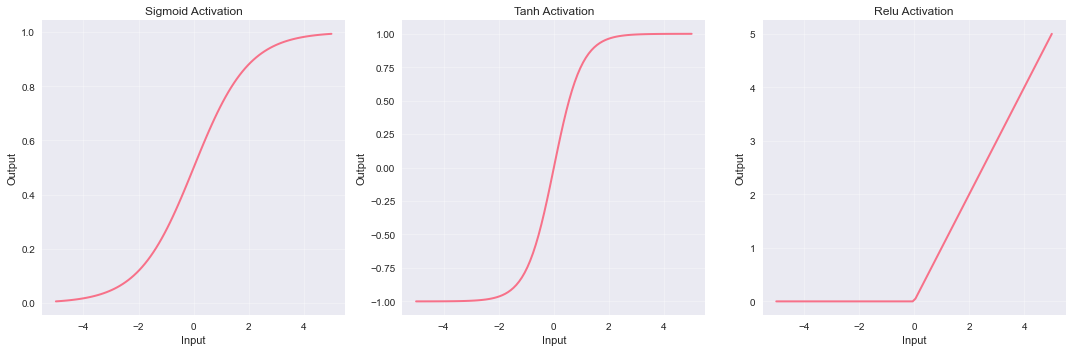


Note: Our training algorithm is specifically designed for the step function.
For other activation functions, we would need gradient descent and backpropagation.


In [11]:
# Test different activation functions on AND gate
activations = ['sigmoid', 'tanh', 'relu']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, activation in enumerate(activations):
    print(f"\nTesting {activation} activation:")
    
    # Create perceptron with different activation
    perceptron = Perceptron(n_inputs=2, activation=activation, learning_rate=0.1)
    
    # For non-step functions, we'll just show the outputs without training
    # (since our training rule is designed for step function)
    
    # Test with random weights
    outputs = perceptron.predict(X_and)
    print(f"Outputs with {activation}: {outputs}")
    
    # Plot activation function
    x = np.linspace(-5, 5, 100)
    y = perceptron.activation(x)
    
    axes[i].plot(x, y, linewidth=2)
    axes[i].set_title(f'{activation.title()} Activation')
    axes[i].grid(True, alpha=0.3)
    axes[i].set_xlabel('Input')
    axes[i].set_ylabel('Output')

plt.tight_layout()
plt.show()

print("\nNote: Our training algorithm is specifically designed for the step function.")
print("For other activation functions, we would need gradient descent and backpropagation.")

## 10. Real-World Example: Iris Dataset (2D)

Let's apply our perceptron to a real-world dataset:

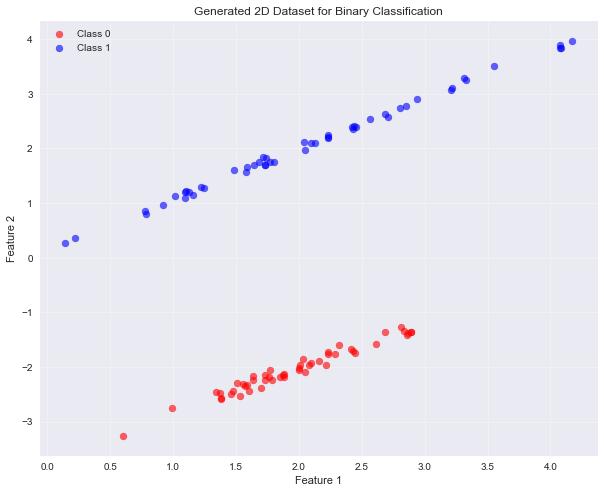

Training perceptron on 2D dataset...
Converged after 3 epochs!

Accuracy: 100.00%


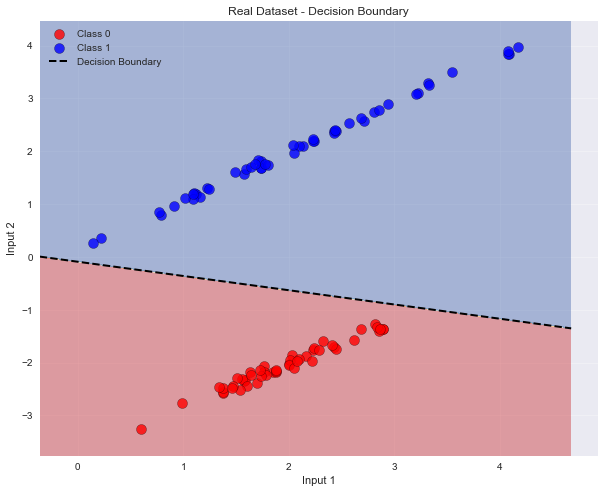

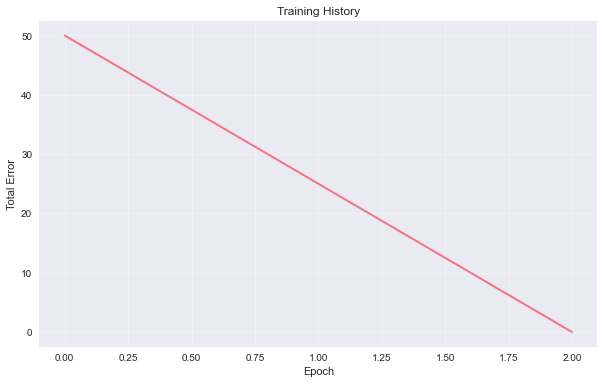

In [12]:
# Create a simple 2D dataset for binary classification
from sklearn.datasets import make_classification

# Generate linearly separable data
X_real, y_real = make_classification(n_samples=100, 
                                    n_features=2, 
                                    n_redundant=0, 
                                    n_informative=2,
                                    random_state=42, 
                                    n_clusters_per_class=1,
                                    class_sep=2.0)

# Visualize the data
plt.figure(figsize=(10, 8))
colors = ['red', 'blue']
for i in range(2):
    mask = y_real == i
    plt.scatter(X_real[mask, 0], X_real[mask, 1], 
               c=colors[i], label=f'Class {i}', alpha=0.6)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated 2D Dataset for Binary Classification')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Train perceptron on this data
print("Training perceptron on 2D dataset...")
perceptron_real = Perceptron(n_inputs=2, activation='step', learning_rate=0.01)
perceptron_real.train(X_real, y_real, epochs=100)

# Calculate accuracy
predictions = perceptron_real.predict(X_real)
accuracy = np.mean(predictions == y_real)
print(f"\nAccuracy: {accuracy:.2%}")

# Plot decision boundary
plot_decision_boundary(perceptron_real, X_real, y_real, "Real Dataset - Decision Boundary")

# Plot training history
perceptron_real.plot_training_history()

## Summary

In this notebook, we've learned:

1. **Implemented a perceptron from scratch** using NumPy
2. **Understanding of activation functions** and their roles
3. **Forward propagation** and how perceptrons make predictions
4. **Training using the perceptron learning rule**
5. **Visualizing decision boundaries** and understanding limitations
6. **Testing on different problems** including logic gates
7. **Understanding the limitation** with non-linearly separable data (XOR)

### Key Takeaways:

- **Perceptrons can only solve linearly separable problems**
- **The choice of activation function affects the output range**
- **Learning rate affects convergence speed and stability**
- **Visualization helps understand what the model is learning**
- **Real-world applications require careful data preprocessing**

### Next Steps:

1. Learn about **multi-layer perceptrons** (neural networks)
2. Understand **backpropagation** for training deep networks
3. Explore **different optimization algorithms** (SGD, Adam, etc.)
4. Study **regularization techniques** to prevent overfitting
5. Practice with **real datasets** and different problem types

Great job completing this hands-on implementation!